# 1. Business Understanding

#### 1.1. Project Overview

Tanzania is a country with a population of 57 million. It faces significant challenges in providing clean and reliable water to its population.
The country has established numerous water points to meet this need but many of these water points are not fully functional, with some requiring repairs and others have failed entirely.
This project aims to predict the functionality of these water pumps, distingishing between those that are fully functional, those that need repairs and those that do not work at all

#### 2.1. Objective
The primary objective is to develop a predictive model that can accurately classify the operational status of water pumps into one of three categories:
- Functional: The water pump is fully operational and provides clean water.
- Needs repair: The water pump is operational but requires some maintenance or repair to ensure optimal performance.
- Non-Functional: The water pump has failed and is not providing water.

#### 3.1. Stakeholders
- Non-Governmental Organizations(NGOs): Various NGOs involved in providing support for wells needing repairs in Tanzania
- Government of Tanzania throught the Tanzanian Ministry of Water: The government is looking to find patterns in non-functional wells to influence how new wells are built

#### 4.1. Key Questions
1. What are the critical factors influencing the functionality of water pumps in Tanzania?
2. How can we use historical data to predict the current operational status of a water pump?
3. What are the cost implications of accurately predicting pump functionality?
4. How can this model be intergrated into existing maintenance workflows to maximize its impact?


# 2. Data Understanding

#### Understanding the first five rows of the dataset

In [2]:
# Viewing the first five rows of the dataset
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


#### Generating summary statistics 

In [1]:
import pandas as pd

# Load data
train_values = pd.read_csv('Data/Training-set-values.csv')
train_labels = pd.read_csv('Data/Training-set-labels.csv')

# Merge data
train_data = pd.merge(train_values, train_labels, on='id')

# Summary statistics for numerical variables
numerical_summary = train_data.describe()

# Summary statistics for categorical variables
categorical_summary = train_data.describe(include=['object'])

# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100

#Display
print("Numerical Summary : \n", numerical_summary)
print("\nCategorical Summary : \n", categorical_summary)
print("\nMissing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)

Numerical Summary : 
                  id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482

Based on the above summary we can better understand our data as follows:
- `amount_tsh` has a median of 0.0 which indicates that many water points have an `amount_tsh` of 0
- We also see there is outliers in our data as indicated by the max_value of `amount_tsh` being 350,000
- `population` median is indicated as 25 which indicates many water points serve small populations


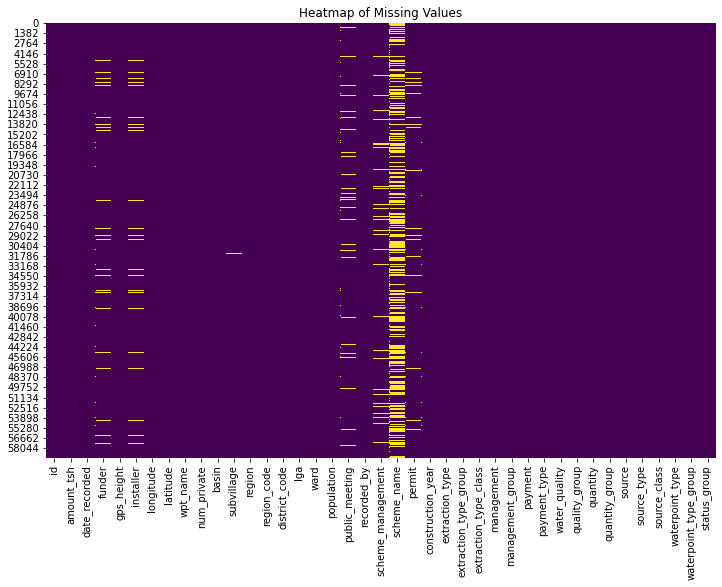

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

From the above heatmap, we can see that `scheme_name` has significant number of missing values and this needs to be addressed.

In [8]:
train_data['scheme_name'].fillna('Unknown', inplace=True)

Since `scheme_name` has a high number of missing values, I have decided to fill the missing values with 'Unknown'

In [11]:
from sklearn.impute import SimpleImputer

# Mode imputation
imputer = SimpleImputer(strategy='most_frequent')
train_data[['funder', 'installer', 'public_meeting', 'scheme_management', 'permit']] = imputer.fit_transform(train_data[['funder', 'installer', 'public_meeting', 'scheme_management', 'permit']])


Since `funder` , `installer`, `public_meeting`, `scheme_management` and `permit` are all categorical variables, I have decided to use mode to fill the missing values of the rows.

In [12]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values

id                         0
amount_tsh                 0
date_recorded              0
funder                     0
gps_height                 0
installer                  0
longitude                  0
latitude                   0
wpt_name                   0
num_private                0
basin                      0
subvillage               371
region                     0
region_code                0
district_code              0
lga                        0
ward                       0
population                 0
public_meeting             0
recorded_by                0
scheme_management          0
scheme_name                0
permit                     0
construction_year          0
extraction_type            0
extraction_type_group      0
extraction_type_class      0
management                 0
management_group           0
payment                    0
payment_type               0
water_quality              0
quality_group              0
quantity                   0
quantity_group